In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('airdata.csv', encoding="ISO-8859-1")

/home/user/anaconda3/envs/p36workshop/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset.describe()

so2            no2           rspm            spm        pm2_5
count  401096.000000  419509.000000  395520.000000  198355.000000  9314.000000
mean       10.829414      25.809623     108.832784     220.783480    40.791467
std        11.177187      18.503086      74.872430     151.395457    30.832525
min         0.000000       0.000000       0.000000       0.000000     3.000000
25%         5.000000      14.000000      56.000000     111.000000    24.000000
50%         8.000000      22.000000      90.000000     187.000000    32.000000
75%        13.700000      32.200000     142.000000     296.000000    46.000000
max       909.000000     876.000000    6307.033333    3380.000000   504.000000

The dataset consists primarily 5 different types pollutants measured over the years in different states and cities of India.

Where SO2 and NO2 are harmful gaseous emmissions; rspm, spm and pm2_5 come under susended air pollutants.



In [4]:
dataset.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [5]:
dataset.head()

stn_code       sampling_date           state   location agency  \
0      150  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1      151  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2      152  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3      150     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4      151     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5        date  
0                         NaN    NaN  1990-02-01  
1                         NaN    NaN  1990-02-01  
2                         NaN    NaN  1990-02-01  
3                         NaN    NaN  1990-03-01  
4                         NaN    NaN  1990-03-01

More about pollutants:

NO2: Nitrogen Dioxide and is emmitted mostly from combustion from power sources or transport.

SO2: Sulphur Dioxide and is emmitted mostly from coal burning, oil burning, manufacturing of Sulphuric acid.

spm: Suspended particulate matter and are known to be the deadliest form of air pollution. They are microscopic in nature and are found to be suspended in earth's atmosphere.

rspm: Respirable suspended particulate matter. A sub form of spm and are respnsible for respiratory diseases.

pm2_5: Suspended particulate matter with diameters less than 2.5 micrometres. They tend to remain suspended for longer durations and potentially very harmful.



# cleaning the data

In [6]:
dataset.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      430349 non-null  object 
 3   so2       401096 non-null  float64
 4   no2       419509 non-null  float64
 5   rspm      395520 non-null  float64
 6   spm       198355 non-null  float64
 7   pm2_5     9314 non-null    float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


state   location                                type  so2   no2  \
0  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  4.8  17.4   
1  Andhra Pradesh  Hyderabad                     Industrial Area  3.1   7.0   
2  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.2  28.5   
3  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.3  14.7   
4  Andhra Pradesh  Hyderabad                     Industrial Area  4.7   7.5   

   rspm  spm  pm2_5        date  
0   NaN  NaN    NaN  1990-02-01  
1   NaN  NaN    NaN  1990-02-01  
2   NaN  NaN    NaN  1990-02-01  
3   NaN  NaN    NaN  1990-03-01  
4   NaN  NaN    NaN  1990-03-01

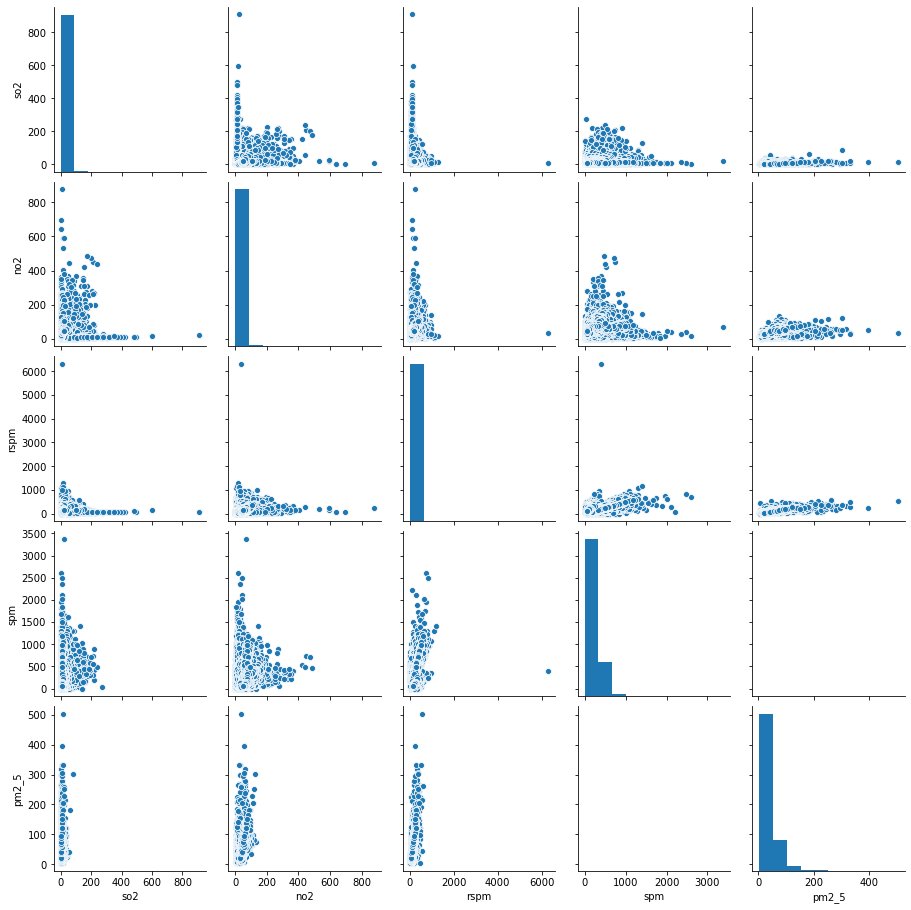

In [21]:
sns.pairplot(dataset)

# visualising data set

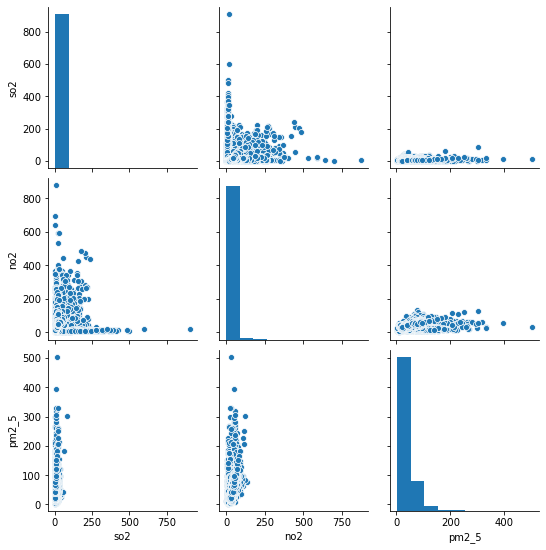

In [7]:
sns.pairplot(dataset[['so2','no2','pm2_5']])

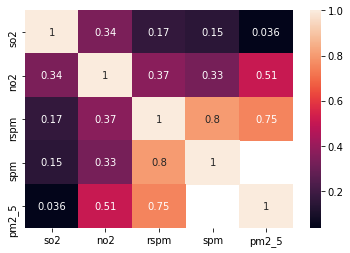

In [8]:
sns.heatmap(
    dataset.loc[:, ['state','so2', 'no2', 'rspm', 'spm', 'pm2_5']].corr(),
    annot=True
)


# Analysing state wise emissions

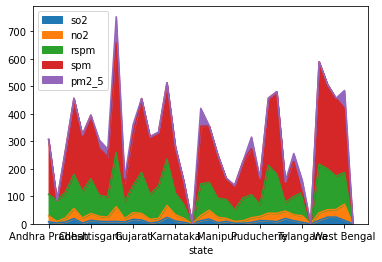

In [9]:
statewise_emmissions = dataset.groupby('state').mean()[['so2', 'no2', 'rspm', 'spm', 'pm2_5']]
statewise_emmissions.plot.area()

In [10]:
statewise_emmissions.describe()

so2        no2        rspm         spm      pm2_5
count  34.000000  34.000000   34.000000   32.000000  10.000000
mean   10.489046  22.860877  100.862013  197.679359  44.877515
std     6.410298  11.884855   41.223317   84.919045  23.444821
min     2.059736   5.469697   32.000000   67.254193  18.855612
25%     5.744773  14.915142   74.446205  142.588924  29.790737
50%     8.947747  21.652826   92.797557  198.240715  36.466892
75%    12.787148  27.106787  123.202467  250.755396  59.660200
max    24.697736  59.075731  196.639771  399.402088  95.113208

In [11]:
Top10States_with_highest_No2=statewise_emmissions.sort_values(by='no2',ascending=False).head(10)
Top10States_with_highest_No2_sorted=Top10States_with_highest_No2.loc[:,['no2']]
Top10States_with_highest_No2_sorted.head()

no2
state                 
West Bengal  59.075731
Delhi        53.489147
Jharkhand    43.366341
Bihar        36.575525
Maharashtra  32.115370

This indicates West Bengal and Delhi show the highest NO2 emmissions over the years

In [12]:
#from sklearn.model_selection import train_test_split

# Linear regression

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      430349 non-null  object 
 3   so2       401096 non-null  float64
 4   no2       419509 non-null  float64
 5   rspm      395520 non-null  float64
 6   spm       198355 non-null  float64
 7   pm2_5     9314 non-null    float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB
